##### __Problem 1__
 
Let K = \$40.0$, $r = 8$, $\sigma = 30\%$, $T = 1.0$, and $\delta = 0.0$. 

a. Write Python functions for delta, gamma, vega, theta and rho for European call and put options under the BSM model.

b. Calculate and plot delta, gamma, vega, theta, and rho for a call option for a range of time $T$ stock prices ($S_{T}$) ranging from $\$0.0$ to $\$80.0$.

c. Repeat the above for a put option.

In [16]:
import numpy as np
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt

In [1]:
##data from question
strike = 40.0
vol = 0.30
rate = 0.08
tau = 1
div = 0.0

In [2]:
##bsm call pricer
def blackScholesCall(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot/strike)+(rate-div+0.5*vol*vol)*tau)/(vol*np.sqrt(tau))
    d2 = d1-(vol*np.sqrt(tau))
    callPrc = (spot*np.exp(-div*tau)*norm.cdf(d1))-(strike*np.exp(-rate*tau)*norm.cdf(d2))
    
    return callPrc

In [3]:
##calculate delta
def bsmCallDelta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot/strike)+(rate-div+0.5*vol*vol)*tau)/(vol*np.sqrt(tau))
    d2 = d1-(vol*np.sqrt(tau))
    cDelta = np.exp(-div*tau)*norm.cdf(d1)
    
    return cDelta

def bsmPutDelta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot/strike)+(rate-div+0.5*vol*vol)*tau)/(vol*np.sqrt(tau))
    d2 = d1-(vol*np.sqrt(tau))
    pDelta = np.exp(-div*tau)*norm.cdf(-d1)

    return pDelta

In [4]:
##calculate gamma
def bsmGamma(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot/strike)+(rate-div+0.5*vol*vol)*tau)/(vol*np.sqrt(tau))
    d2 = d1-(vol*np.sqrt(tau))
    gamma = (np.exp(-div*tau)/(spot*vol*np.sqrt(tau)))*norm.pdf(d1)
    
    return gamma

In [5]:
##calculate theta
def bsmCallTheta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot/strike)+(rate-div+0.5*vol*vol)*tau)/(vol*np.sqrt(tau))
    d2 = d1-(vol*np.sqrt(tau))
    cTheta = (div*spot**(-div*tau))*norm.cdf(d1)-(rate*strike*np.exp(-rate*tau))*norm.cdf(d2)-(((vol*strike*np.exp(-rate*tau))/(2*np.sqrt(tau)))*norm.pdf(d2))
    
    return cTheta

def bsmPutTheta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot/strike)+(rate-div+0.5*vol*vol)*tau)/(vol*np.sqrt(tau))
    d2 = d1-(vol*np.sqrt(tau))
    cTheta = (div*norm.cdf(d1)*spot**(-div*tau))-(rate*strike*norm.cdf(d2)*np.exp(-rate*tau))-(((vol*strike*np.exp(-rate*tau))/(2*np.sqrt(tau)))*norm.pdf(d2))
    pTheta = cTheta+(rate*strike*np.exp(-rate*tau))-(div*spot*np.exp(-div*tau))
    
    return pTheta

In [6]:
##calculate vega
def bsmVega(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot/strike)+(rate-div+0.5*vol*vol)*tau)/(vol*np.sqrt(tau))
    d2 = d1-(vol*np.sqrt(tau))
    vega = spot*np.exp(-div*tau)*np.sqrt(tau)*norm.pdf(d1)
    
    return vega

In [7]:
##calculate rho
def bsmCallRho(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot/strike)+(rate-div+0.5*vol*vol)*tau)/(vol*np.sqrt(tau))
    d2 = d1-(vol*np.sqrt(tau))
    cRho = tau*strike*np.exp(-rate*tau)*norm.cdf(d2)
    
    return cRho

def bsmPutRho(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot/strike)+(rate-div+0.5*vol*vol)*tau)/(vol*np.sqrt(tau))
    d2 = d1-(vol*np.sqrt(tau))
    pRho = tau*strike*np.exp(-rate*tau)*norm.cdf(-d2)
    
    return pRho

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


<function matplotlib.pyplot.show(*args, **kw)>

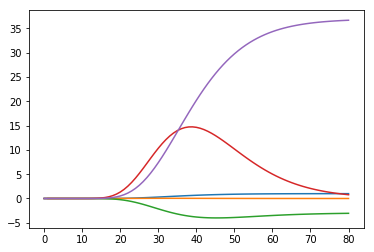

In [18]:
#call greeks

call_deltas= np.empty(81)
call_gammas= np.empty(81)
call_thetas= np.empty(81)
call_vegas= np.empty(81)
call_rhos= np.empty(81)

for i in range(81):
    call_deltas[i] = bsmCallDelta(i, strike, vol, rate, tau, div)
    call_gammas[i] = bsmGamma(i, strike, vol, rate, tau, div)
    call_thetas[i] = bsmCallTheta(i, strike, vol, rate, tau, div)
    call_vegas[i] = bsmVega(i, strike, vol, rate, tau, div)
    call_rhos[i] = bsmCallRho(i, strike, vol, rate, tau, div)
    
plt.plot(call_deltas)
plt.show

plt.plot(call_gammas)
plt.show

plt.plot(call_thetas)
plt.show

plt.plot(call_vegas)
plt.show

plt.plot(call_rhos)
plt.show

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


<function matplotlib.pyplot.show(*args, **kw)>

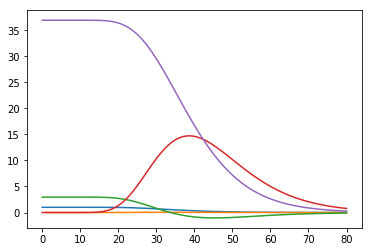

In [19]:
###put greeks

put_deltas= np.empty(81)
put_gammas= np.empty(81)
put_thetas= np.empty(81)
put_vegas= np.empty(81)
put_rhos= np.empty(81)

for i in range(81):
    put_deltas[i] = bsmPutDelta(i, strike, vol, rate, tau, div)
    put_gammas[i] = bsmGamma(i, strike, vol, rate, tau, div)
    put_thetas[i] = bsmPutTheta(i, strike, vol, rate, tau, div)
    put_vegas[i] = bsmVega(i, strike, vol, rate, tau, div)
    put_rhos[i] = bsmPutRho(i, strike, vol, rate, tau, div)
    
plt.plot(put_deltas)
plt.show

plt.plot(put_gammas)
plt.show

plt.plot(put_thetas)
plt.show

plt.plot(put_vegas)
plt.show

plt.plot(put_rhos)
plt.show

##### __Problem 2__

Using the same basic data above, plus an initial stock price of $S_{0} = \$41.0$ simulate five daily prices (sequentially), using the following:

S_{t+h} = S_{t} \exp{\{(r - \delta - \frac{1}{2} \sigma^{2}) h + \sigma \sqrt{h} Z \}}

where $Z$ is a draw from a standard normal distribution. This can be done in \texttt{Python} as follows (for a single draw):

```{python}
import numpy as np
z = np.random.normal(size=1)
```

See Chapter 19 in the McDonald text for additional guidance on the simulation. Once you have the five simulated daily prices construct a table for delta-hedging similar to table 13.2 (page 420 2nd edition, page 387 3rd edition) of the McDonald textbook. Be sure to set $h$ to equal a day (i.e. $h = 1/252$). 

In [23]:
def plotPricePath(path):
    nsteps = path.shape[0]
    plt.plot(path, 'b', linewidth = 2.5)
    plt.xlim((0, nsteps - 1))
    plt.grid(True)
    plt.show()

In [27]:
##data from question
spot = 41.0
strike = 40.0
vol = 0.30
rate = 0.08
tau = 1/252
div = 0.0

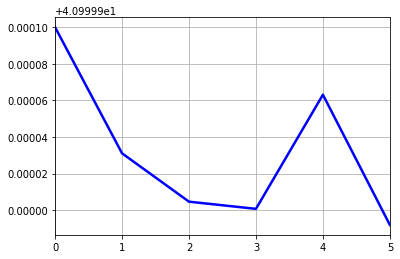

In [31]:
n=6
path=np.zeros(n)
z=np.random.normal(size=n)
path[0]=spot
for t in range(1,n):
    path[t] = path[t-1] * np.exp((rate - div - 0.5 * vol * vol) * tau * vol * np.sqrt(tau) * z[t])
plotPricePath(path)